Coastal Erosion Simulation and Optimization
This script demonstrates how to use the coastal erosion simulation system.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from coastal_simulation import CoastalSimulation
from simulation import simulation
from optimization import OptimizationManager

In [2]:
def visualize_layers(state):
    """
    Visualize individual layers of the simulation state
    """
    titles = ['Ground Layer', 'Sand Layer', 'Water Layer']
    
    # Create a figure with 4 subplots (composite + 3 layers)
    plt.figure(figsize=(20, 5))
    
    # Plot composite image
    plt.subplot(1, 4, 1)
    plt.imshow(state)
    plt.title('Composite View')
    plt.colorbar()
    
    # Plot individual layers
    for i in range(3):
        plt.subplot(1, 4, i + 2)
        plt.imshow(state[:,:,i])
        plt.title(titles[i])
        plt.colorbar()
    
    plt.tight_layout()
    plt.show()

In [3]:
def run_basic_simulation():
    """
    Initialize and run a basic simulation with default parameters
    """
    print("Running basic simulation...")
    
    # Create simulation instance
    # sim = CoastalSimulation()
    sim = simulation(
        wave_freq=20,
        wave_speed=1,
        wave_decay=0.6,
        wave_cutoff=0.1,
        wave_retreat_coeff=0.8,
        wave_height=2,
        sand_pull=0.2,
        ground_pull=0.1,
        water_decay=0.99,
        wave_vol=1,
        wave_amplitude=50,
        wave_spread=0
    )
    
    # Run a basic simulation
    _, final_state, total_sand = sim.run_sim(
        num_timesteps=100,
    )

    # Display results with layer visualization
    visualize_layers(final_state)
    
    print(f"Basic simulation completed. Total sand: {total_sand}")
    return sim

In [9]:
def run_optimization():
    """
    Run the optimization process using the provided simulation
    """
    print("\nStarting optimization process...")
    
    # Initialize optimization
    opt_manager = OptimizationManager()
    
    # Sample initial parameters
    n_samples = 10
    param_samples = opt_manager.sample_parameters(n_samples)
    
    # Run initial simulations
    print(f"Running {n_samples} initial simulations...")
    outcomes = []
    for i, params in enumerate(param_samples):
        print(f"Running simulation {i+1}/{n_samples}")
        _, _, outcome = simulation(
            wave_freq=params[0],
            wave_speed=params[1],
            wave_decay=params[2],
            wave_cutoff=params[3],
            wave_retreat_coeff=params[4],
            wave_height=params[5],
            sand_pull=params[6],
            ground_pull=params[7],
            water_decay=params[8],
            wave_vol=params[9],
            wave_amplitude=params[10],
            wave_spread=params[11]

        ).run_sim(
            num_timesteps=100
        )
        outcomes.append(outcome)
    
    # Convert to numpy arrays
    X = np.array(param_samples)
    Y = np.array(outcomes).reshape(-1, 1)
    
    # Run sensitivity analysis
    print("\nRunning sensitivity analysis...")
    main_effects, total_effects = opt_manager.run_sensitivity_analysis(X, Y)
    print("Main effects:", main_effects)
    print("Total effects:", total_effects)
    
    # Run optimization
    print("\nRunning Bayesian optimization...")
    loop_state = opt_manager.run_optimization(X, Y)
    
    # Get and print best results
    best_parameters = loop_state.X[-1]  # Access X directly from loop_state
    best_outcome = loop_state.Y[-1]     # Access Y directly from loop_state
    
    print("\nOptimization Results:")
    param_names = list(opt_manager.parameter_space.parameter_names)
    for name, value in zip(param_names, best_parameters):
        print(f"{name}: {value:.4f}")
    print(f"Best outcome: {best_outcome[0]:.4f}")
    
    # Run simulation with best parameters
    print("\nRunning simulation with best parameters...")
    _, final_state, final_sand = simulation(
        wave_freq=best_parameters[0],
        wave_speed=best_parameters[1],
        wave_decay=best_parameters[2],
        wave_cutoff=best_parameters[3],
        wave_retreat_coeff=best_parameters[4],
        wave_height=best_parameters[5],
        sand_pull=best_parameters[6],
        ground_pull=best_parameters[7],
        water_decay=best_parameters[8],
        wave_vol=best_parameters[9],
        wave_amplitude=best_parameters[10],
        wave_spread=best_parameters[11]
    ).run_sim(
        num_timesteps=100,
        plots=False
    )
    
    # Display final results with layer visualization
    visualize_layers(final_state)
    
    return loop_state

Running basic simulation...


  0%|          | 0/99 [00:00<?, ?it/s]

Total sand: 86000


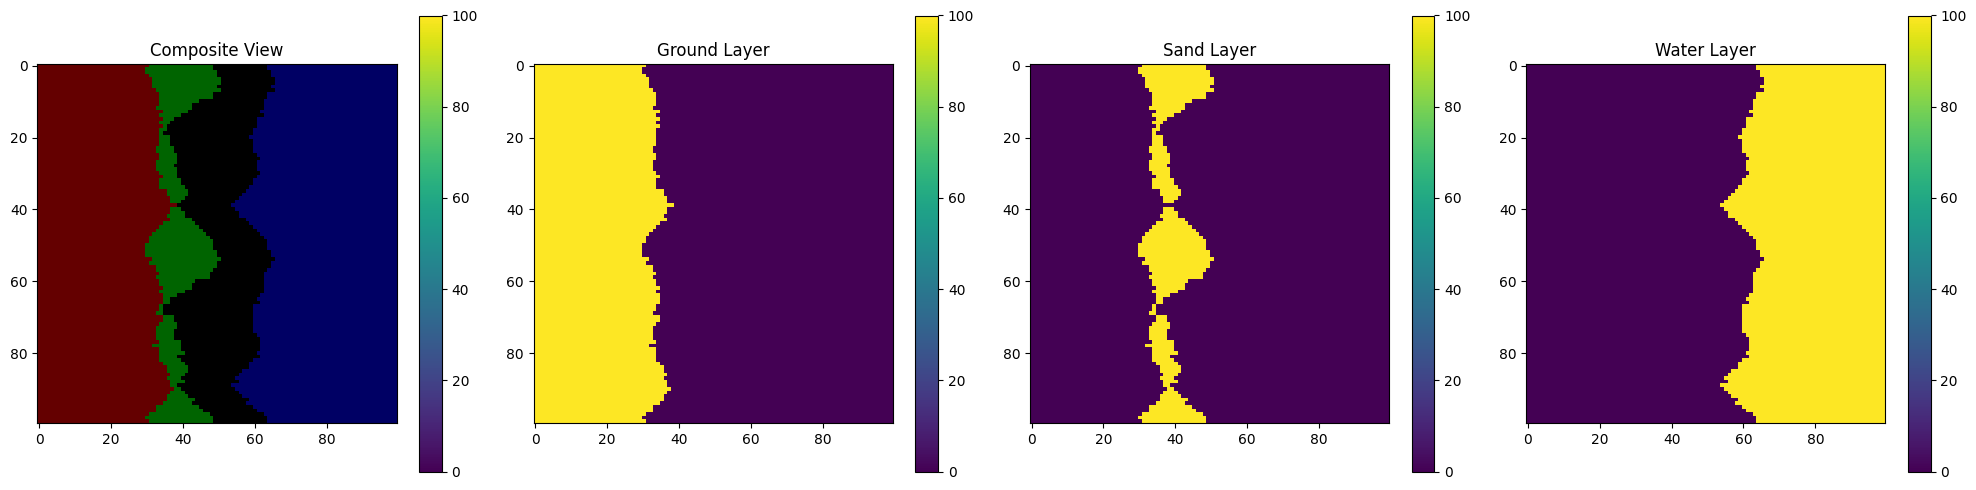

Basic simulation completed. Total sand: 86000

Starting optimization process...
Running 10 initial simulations...
Running simulation 1/10


  0%|          | 0/99 [00:00<?, ?it/s]

Total sand: 156900
Running simulation 2/10


  0%|          | 0/99 [00:00<?, ?it/s]

Total sand: 304000
Running simulation 3/10


  0%|          | 0/99 [00:00<?, ?it/s]

Total sand: 109500
Running simulation 4/10


  0%|          | 0/99 [00:00<?, ?it/s]

Total sand: 311700
Running simulation 5/10


  0%|          | 0/99 [00:00<?, ?it/s]

Total sand: 188200
Running simulation 6/10


  0%|          | 0/99 [00:00<?, ?it/s]

Total sand: 199200
Running simulation 7/10


  0%|          | 0/99 [00:00<?, ?it/s]

Total sand: 215500
Running simulation 8/10


  0%|          | 0/99 [00:00<?, ?it/s]

Total sand: 38600
Running simulation 9/10


  0%|          | 0/99 [00:00<?, ?it/s]

Total sand: 292188
Running simulation 10/10


  0%|          | 0/99 [00:00<?, ?it/s]

Total sand: 173100

Running sensitivity analysis...
Main effects: {'wave_freq': array([0.13205323]), 'wave_speed': array([0.00113166]), 'wave_decay': array([-0.00215126]), 'wave_cutoff': array([-0.00221089]), 'wave_retreat_coeff': array([-0.00199004]), 'wave_height': array([0.02091501]), 'sand_pull': array([-0.00239439]), 'ground_pull': array([-0.00221424]), 'water_decay': array([-0.00221088]), 'wave_vol': array([0.01831845]), 'wave_amplitude': array([0.00302317]), 'wave_spread': array([0.00876451])}
Total effects: {'wave_freq': array([0.87627428]), 'wave_speed': array([0.09485533]), 'wave_decay': array([0.05519361]), 'wave_cutoff': array([0.0548202]), 'wave_retreat_coeff': array([0.05662862]), 'wave_height': array([0.45278288]), 'sand_pull': array([0.05490986]), 'ground_pull': array([0.05477035]), 'water_decay': array([0.05482807]), 'wave_vol': array([0.40609502]), 'wave_amplitude': array([0.32925981]), 'wave_spread': array([0.42463472])}

Running Bayesian optimization...


  0%|          | 0/99 [00:00<?, ?it/s]

Total sand: 267610


 /Users/amogh/.pyenv/versions/3.10.11/lib/python3.10/site-packages/paramz/transformations.py:111: RuntimeWarning:overflow encountered in expm1


  0%|          | 0/99 [00:00<?, ?it/s]

Total sand: 180300


  0%|          | 0/99 [00:00<?, ?it/s]

Total sand: 24700


  0%|          | 0/99 [00:00<?, ?it/s]

Total sand: 127060


  0%|          | 0/99 [00:00<?, ?it/s]

Total sand: 199100


  0%|          | 0/99 [00:00<?, ?it/s]

Total sand: 314671


  0%|          | 0/99 [00:00<?, ?it/s]

Total sand: 137900


  0%|          | 0/99 [00:00<?, ?it/s]

Total sand: 303400


  0%|          | 0/99 [00:00<?, ?it/s]

Total sand: 273200


  0%|          | 0/99 [00:00<?, ?it/s]

Total sand: 208500


  0%|          | 0/99 [00:00<?, ?it/s]

Total sand: 141400


  0%|          | 0/99 [00:00<?, ?it/s]

Total sand: 193872


  0%|          | 0/99 [00:00<?, ?it/s]

Total sand: 307300


  0%|          | 0/99 [00:00<?, ?it/s]

Total sand: 265200


  0%|          | 0/99 [00:00<?, ?it/s]

Total sand: 83300


  0%|          | 0/99 [00:00<?, ?it/s]

Total sand: 203546


  0%|          | 0/99 [00:00<?, ?it/s]

Total sand: 285000


  0%|          | 0/99 [00:00<?, ?it/s]

Total sand: 279000


  0%|          | 0/99 [00:00<?, ?it/s]

Total sand: 247862


  0%|          | 0/99 [00:00<?, ?it/s]

Total sand: 310647

Optimization Results:
wave_freq: 10.4872
wave_speed: 1.5324
wave_decay: 0.5219
wave_cutoff: 0.1285
wave_retreat_coeff: 0.8980
wave_height: 4.5478
sand_pull: 0.4196
ground_pull: 0.0986
water_decay: 0.9958
wave_vol: 1.0364
wave_amplitude: 2.0386
wave_spread: 0.1931
Best outcome: -310647.0000

Running simulation with best parameters...


  0%|          | 0/99 [00:00<?, ?it/s]

Total sand: 289920


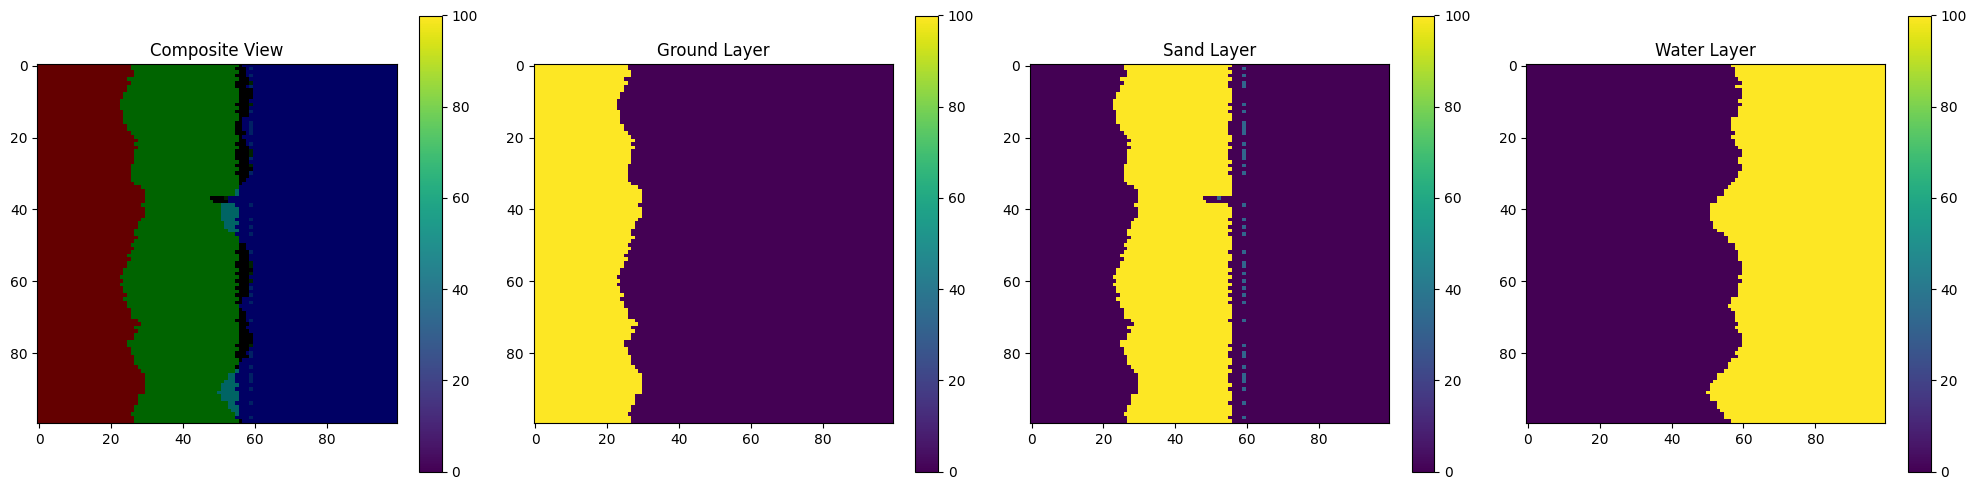


Demonstration completed!


In [10]:
# Run basic simulation
sim = run_basic_simulation()

# Run optimization
results = run_optimization()

print("\nDemonstration completed!")